In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
import wotan
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv("statistics.csv", header=None, names=["mean", "std", "min_time", "max_time"])
df.head(5)

,0,1,2,3
0,0.998655,0.007964,131.512714,1591.001514
1,1.000000,0.000182,120.539300,1591.001496
2,0.999996,0.000179,120.539313,1591.001511
3,0.999941,0.002780,169.520752,1591.001480
4,0.993317,0.046861,1274.140307,1471.136087


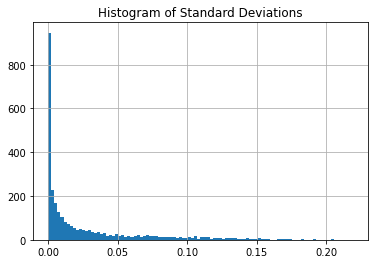

In [4]:
df.hist(column=1, bins=100)
plt.title("Histogram of Standard Deviations")
plt.show()

In [5]:
df[1].mean()

0.026965806812828032

In [6]:
df[(df[1] > 0.05) & ((1 - df[0]) > df[1] * 2)]

,0,1,2,3


In [7]:
df[(df[1] > 0.05) & ((1 - df[0]) > df[1] * 2)]

,0,1,2,3


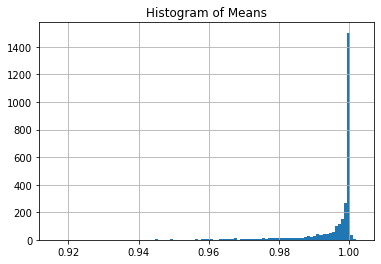

In [8]:
df.hist(column=0, bins=100)
plt.title("Histogram of Means")
plt.show()

In [9]:
df[0].mean()

0.995372060887756

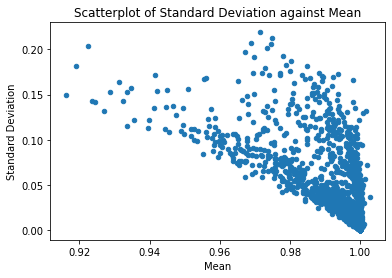

In [10]:
df.plot(kind="scatter",x=0,y=1)
plt.title("Scatterplot of Standard Deviation against Mean")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.show()

In [11]:
def get_threshold(median, std):
    if std < 0.005:
        return median - std * 3
    elif std < 0.05:
        return median - std * 1.4
        # I know this is discontinuous, but it actually works better.
        # A lot of curves with moderate deviations are just very periodic,
        # so if the threshold is too low you miss everything
    else:
        return median - 0.070  # Change this last bit

In [13]:
with open("../data/all_systems.txt") as f:
    all_systems = f.read().split(",")

system_id = all_systems[24]
system_id

'kplr002302092.fits'

0.9989333557496681
1.003894626273016
0.0727860713270999


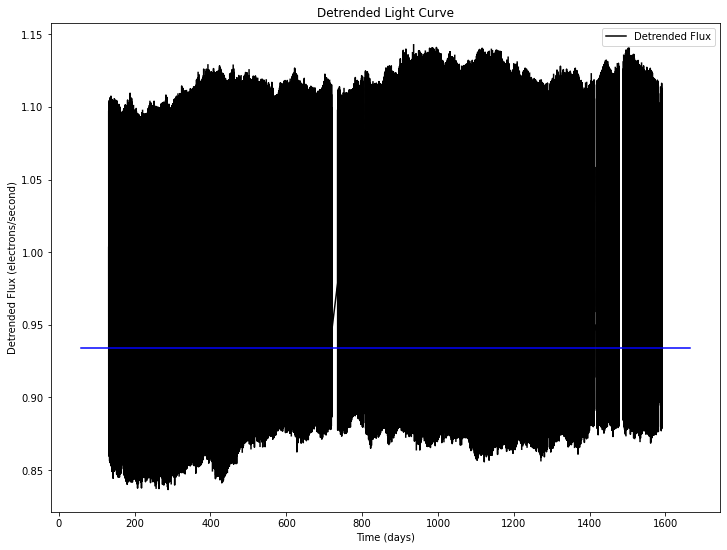

In [15]:
table = Table.read("../data/combined/" + system_id, format="fits")

times = table["TIME"]
sap_fluxes = table["SAP_FLUX"]

flattened_lc = wotan.flatten(times, sap_fluxes, window_length=0.5, method='biweight')
mean = np.nanmean(flattened_lc)
median = np.nanmedian(flattened_lc)
std = np.nanstd(flattened_lc)
counts, bins = np.histogram(flattened_lc[~np.isnan(flattened_lc)], bins=np.linspace(0, 1, 500))
print(mean)
print(median)
print(std)

threshold = get_threshold(median, std)

plt.figure(figsize=(12, 9))

plt.plot(times, flattened_lc, '-k', label='Detrended Flux')
plt.plot(plt.axis()[:2], [threshold, threshold], "-b")

plt.title('Detrended Light Curve')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Detrended Flux (electrons/second)')
plt.show()